# Asssignment 07: Stats & Modeling

### 1. Shakespeare play

In [1]:
import requests
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from string import punctuation
import numpy as np
import pandas as pd

#### Make a Python string that contains the text of the Shakespeare play, Macbeth

In [2]:
# obtain Macbeth text from Project Gutenberg
with open('macbeth.txt','w',encoding='utf-8') as f:
    f.write(requests.get("https://www.gutenberg.org/files/1533/1533-0.txt").text)

In [3]:
document = open('macbeth.txt', 'r')
text = document.read().lower()

#### Tokenization & Lemmatization

In [4]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [5]:
# tokenize text to sentences
sentences = sent_tokenize(text)

In [6]:
# tokenize sentences to words
words = []
for s in sentences:
    for w in word_tokenize(s):
        words.append(w)

In [7]:
words_stemmed = [WordNetLemmatizer().lemmatize(w) for w in words]

#### Stopwords removal

In [8]:
extra_sw = ["project", "gutenberg", "gutenberg-tm", "--", "...", "\\", "ï", "»", "¿"]

In [9]:
sw = list(punctuation) + stopwords.words('english') + extra_sw

In [10]:
words_no_sw = [w for w in words_stemmed if w not in sw]

#### Word Frequencies - mean, median, mode, and trimmed mean

In [11]:
words_freq = FreqDist(words_no_sw)

In [12]:
wordlist = []
wordfreq = []
for i in sorted(words_freq, key=words_freq.get, reverse=True):
    wordlist.append(i)
    wordfreq.append(words_freq[i])
df = pd.DataFrame({'wordlist': wordlist, 'wordfreq': wordfreq})

In [13]:
# mean
df['wordfreq'].mean()

3.294360385144429

In [14]:
# median
df['wordfreq'].median()

1.0

In [15]:
# mode
df['wordfreq'].mode()

0    1
dtype: int64

In [16]:
# trimmed mean
df[df['wordfreq'] >= 5]['wordfreq'].mean()

14.522772277227723

Words that have a frequency that is lower than 5 times get omitted when calculating the trimmed mean.

#### Plot histogram of the word frequency data

<AxesSubplot:title={'center':'Word Frequency in Macbeth'}, ylabel='Frequency'>

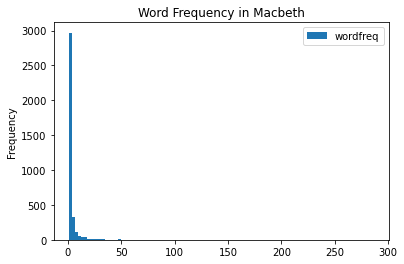

In [17]:
# word frequency histogram
df.plot(kind="hist", bins=100, title="Word Frequency in Macbeth")

The mean word frequency is roughly 3.29, which is on the very left, very lower end in terms of the relative location on the histogram, as the scale of the x-axis is from 0 to over 300. The median and mode are both 1, which shows that the majority of the words appear once, and these values definitely live on the lowest end on the histogram. The trimmed mean, which trimmed the word frequencies lower than 5, has a value of 14.52, which is still on the lower end of the histogram, but it more on the right than the mean, mode, and median.

<AxesSubplot:title={'center':'Word Frequency in Macbeth'}, ylabel='Frequency'>

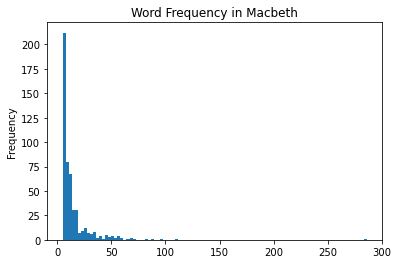

In [18]:
# word frequency histogram with word frequencies >= 5
df[df['wordfreq'] >= 5]['wordfreq'].plot(kind="hist", bins=100, title="Word Frequency in Macbeth")

This histogram only shows the word frequencies greater or equal to 5, and we are able to see the frequency distribution (especially the higher values) more clearly.

In [19]:
# standard deviation
df['wordfreq'].std()

8.272781863104958

In [20]:
# interquartile range
df['wordfreq'].quantile(0.75) - df['wordfreq'].quantile(0.25)

1.0

The standard deviation and the interquartile range could both be used to measure the spread of the values. In this case, the standard deviation and the interquartile range have a large difference because the data is very skewed to the right, which indicates that there are a lot of outliers of greater values. The standard deviation is 8.27, which shows that there could be values that deviates far from the mean, 3.29. The interquartile range is only 2, with the 75% quantile being 2 and the 25% quantile being 1, which shows that a very large number of values clustered at the lower end. On the histogram, the interquartile range would be at the very lower end, and the standard deviation would be to the right of it.

### 2. Foray into machine learning

#### Import scikit-learn's example diabetes dataset as a Panda's dataframe

In [21]:
from sklearn import datasets
df = datasets.load_diabetes(as_frame=True) 
features_df = df.data
target_df = df.target

In [22]:
# view description of the dataset
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Exploratory data analysis

In [23]:
features_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [24]:
# get summary statistical information
features_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


In [25]:
target_df

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

In [26]:
target_df.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [27]:
# find column in features_df of highest correlation coefficient with the target values in target_df
corrcoef_list = []
# loop through each column of features_df and generate 10 coefficients with target_df
for col in features_df.columns:
    corrcoef_list.append(np.corrcoef(features_df[col], target_df)[1][0])

In [28]:
# alternatively:
# for i in range(features_df.shape[1]):
#     corrcoef_list.append(np.corrcoef(features_df.iloc[:,i], target_df)[1][0])

In [29]:
corrcoef_list

[0.1878887507189198,
 0.0430619984516054,
 0.5864501344746891,
 0.4414838489308862,
 0.21202248101455076,
 0.17405358696874249,
 -0.39478925067091847,
 0.4304528847447734,
 0.5658834252428094,
 0.3824834842485812]

In [30]:
# find maximum value of correlation coefficient
max_corrcoef = max(corrcoef_list)
print(max_corrcoef)

0.5864501344746891


In [31]:
# find the column index
index_max_corrcoef = corrcoef_list.index(max_corrcoef)
print(index_max_corrcoef)

2


In [32]:
# find the column name
colname_max_corrcoef = features_df.columns[index_max_corrcoef]
print(colname_max_corrcoef)

bmi


The column in features_df that has the highest correlation coefficient with the target values in target_df is the third column (or 2nd in Python indexing), which is bmi.

<AxesSubplot:xlabel='bmi', ylabel='target'>

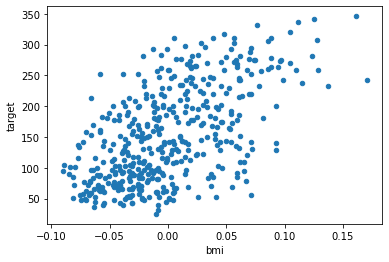

In [33]:
# make scatter plot of the target values vs. the bmi column's values
bmi_target_df = pd.DataFrame({'bmi':features_df[colname_max_corrcoef], 'target':target_df})
bmi_target_df.plot(kind='scatter', x='bmi', y='target')

#### Perform linear regression with Scikit-learn's LinearRegression

In [34]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
X = bmi_target_df[['bmi']]
y = bmi_target_df[['target']]

In [36]:
reg = LinearRegression().fit(X, y)

In [37]:
# find coefficient
reg.coef_

array([[949.43526038]])

In [38]:
# find intercept
reg.intercept_

array([152.13348416])

In [39]:
ytrain = reg.intercept_ + reg.coef_ * X

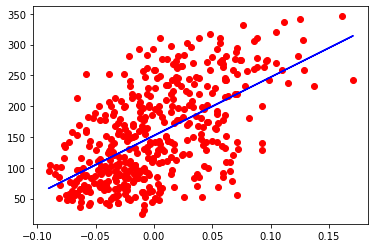

In [40]:
plt.plot(X, y, 'ro', X, ytrain, 'b-');

In [41]:
# calculate mean squared error
mean_squared_error(y, ytrain)

3890.4565854612724

In [42]:
# calculate R-squared value
r2_score(y, ytrain)

0.3439237602253803

#### Linear regression with another variable, s3 (high-density lipoproteins)

In [43]:
# perform linear regression of the target values vs. the s3 column's values
X2 = features_df[['s3']]
y2 = target_df
reg2 = LinearRegression().fit(X2, y2)

In [44]:
# find coefficient
reg2.coef_

array([-639.14527932])

In [45]:
reg2.intercept_

152.13348416289566

In [46]:
ytrain2 = reg2.intercept_ + reg2.coef_ * X2

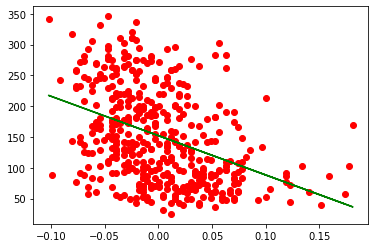

In [47]:
plt.plot(X2, y2, 'ro', X2, ytrain2, 'g-');

In [48]:
# calculate mean squared error
mean_squared_error(y2, ytrain2)

5005.661620710653

In [49]:
# calculate R-squared value
r2_score(y2, ytrain2)

0.1558585524453051

The new fit's mean squared error is bigger than the previous one, and the R-squared value becomes smaller.